* 阐述Logistic回归定义
* 介绍一些最优化算法(梯度上升法、改进的随机梯度上升法，这些最优化算法将用于分类器的训练)
* 给出一些Logistic回归的实例，预测病马是否能被治愈

#### 5.1 基于Logistic回归和Sigmoid函数的分类

能接受所有的输入，然后输出预测类别，例如两个类的情况下输出0或1。这种性质的函数称为海维赛德阶跃函数(Heaviside step function)，或者直接称为单位阶跃函数。

问题：海维赛德阶跃函数在跳跃点上从0瞬间跳跃到1，这个瞬间跳跃过程有时很难处理。

Sigmoid函数也是阶跃函数，而且在数学上更易处理。
Sigmoid函数计算公式：
$$\sigma(z)=\frac{1}{1+e^{-z}}$$

Logistic回归分类器的实现：

可以在每个特征上都乘以一个回归系数，然后把所有的结果值相加，将这个总和代入Sigmoid函数中，进而得到一个范围在0-1之间的数值。任何大于0.5的数据被分入1类，小于0.5即被归为0类。所以，Logistic也被看做是一种概率估计。

#### 5.2 基于最优化方法的最佳回归系数确定 (即，最佳回归系数是多少？)

Sigmoid函数的输入记为z，有下面公式得出：
$$z=w_0x_0+w_1x_1+w_2x_2+...+w_nx_n$$

上述公式，向量写法：$z=w^Tx$ (向量x是分类器的输入数据，向量w是要找的最佳参数，从而使分类器尽可能精确)

* 梯度上升

基于思想：要找到某函数的最大值，最好的方法是沿着该函数的梯度方向探寻。如果梯度记为$\nabla$，则函数f(x,y)的梯度由下式表示：
$$\nabla f(x,y)= \dbinom{\frac{\partial f(x,y)}{\partial x}}{\frac{\partial f(x,y)}{\partial y}}$$
这个梯度意味着，要沿着x的方向移动$\frac{\partial f(x,y)}{\partial x}$,沿y的方向移动$\frac{\partial f(x,y)}{\partial y}$。其中，函数f(x,y)必须要在待计算的点上有定义并且可微。

-- 梯度算子：总数只想函数值增长最快的方向(保证我们选取到最佳的移动方向，这里说的是移动方向，而不是移动量的大小)。

-- 步长：即移动量的大小，记做$\alpha$

-- 向量表示，梯度上升算法迭代公式：$w:=w+\alpha \nabla_w f(w)$  ，该公式一直迭代执行，直到某个停止条件为止（迭代次数达到、误差达到允许范围）

！！！梯度下降算法与梯度上升算法是一样的，只是公式中的加法变减法。因此，公式写成：$w:=w-\alpha \nabla_w f(w)$ 。梯度上升算法用来求函数的最大值，而梯度下降算法用来求函数的最小值。

In [18]:
#Logistic回归梯度上升优化算法
import numpy as np
def loadDataSet():
    dataMat=[]
    labelMat=[]
    fr=open('Ch05/testSet.txt')
    for line in fr.readlines():
        lineArr=line.strip().split()
        dataMat.append([1,float(lineArr[0]),float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat,labelMat

def sigmoid(inX):
    return 1/(1+np.exp(-inX))

def gradAscent(dataMatIn,classLabels):
    dataMatrix=np.mat(dataMatIn)
    labelMat=np.mat(classLabels).transpose()
    m,n=np.shape(dataMatrix)
    alpha=0.001
    maxCycles=500
    weights=np.ones((n,1))
    for k in range(maxCycles):
        h=sigmoid(dataMatrix*weights)
        error=(labelMat-h)
        weights=weights+alpha*dataMatrix.transpose()*error
    return weights

In [30]:
dataArr,labelMat=loadDataSet()
weights=gradAscent(dataArr,labelMat)
weights

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

In [21]:
#画出数据集和Logistic回归最佳拟合直线的函数
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat,labelMat=loadDataSet()
    dataArr=np.array(dataMat)
    n=np.shape(dataArr)[0]
    xcord1=[]
    ycord1=[]
    xcord2=[]
    ycord2=[]
    for i in range(n):
        if int(labelMat[i])==1:
            xcord1.append(dataArr[i,1])
            ycord1.append(dataArr[i,2])
        else:
            xcord2.append(dataArr[i,1])
            ycord2.append(dataArr[i,2])
            
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.scatter(xcord1,ycord1,s=30,c='red',marker='s')
    ax.scatter(xcord2,ycord2,s=30,c='green')
    x=np.arange(-3,3,0.1)
    y=(-weights[0]-weights[1]*x)/weights[2]
    ax.plot(x,y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

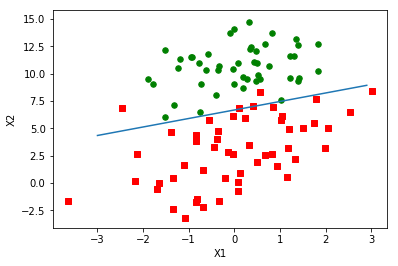

In [32]:
plotBestFit(weights.getA())

In [36]:
#随机梯度上升算法
def stocGradAscent0(dataMatrix,classLabels):
    m,n=np.shape(dataMatrix)
    alpha=0.01
    weights=np.ones(n)
    for i in range(m):
        h=sigmoid(sum(dataMatrix[i]*weights))
        error=classLabels[i]-h
        weights=weights+alpha*error*dataMatrix[i]
    return weights

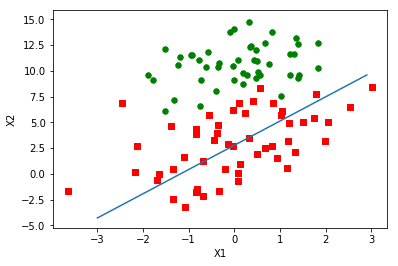

In [37]:
weights=stocGradAscent0(np.array(dataArr),labelMat)
plotBestFit(weights)

In [40]:
#改进的随机梯度上升算法
def stocGradAscent1(dataMatrix,classLabels,numIter=150):
    m,n=np.shape(dataMatrix)
    weights=np.ones(n)
    for j in range(numIter):
        dataIndex=list(range(m))
        for i in range(m):
            alpha=4/(1+j+i)+0.01
            randIndex=int(np.random.uniform(0,len(dataIndex)))
            h=sigmoid(sum(dataMatrix[randIndex]*weights))
            error=classLabels[randIndex]-h
            weights=weights+alpha*error*dataMatrix[randIndex]
            del(dataIndex[randIndex])
    return weights

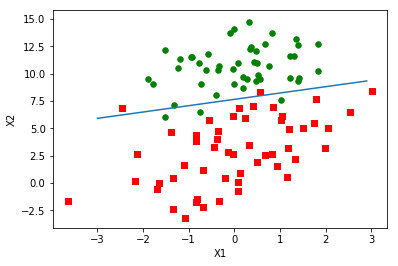

In [63]:
weights=stocGradAscent1(np.array(dataArr),labelMat)
plotBestFit(weights)

#### 5.3 示例：从疝气病症预测病马的死亡率